In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape #Shape of data rxc

(768, 9)

In [8]:
df.isna().sum() #No Null Values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.duplicated().sum() #Checking if there are duplicates

0

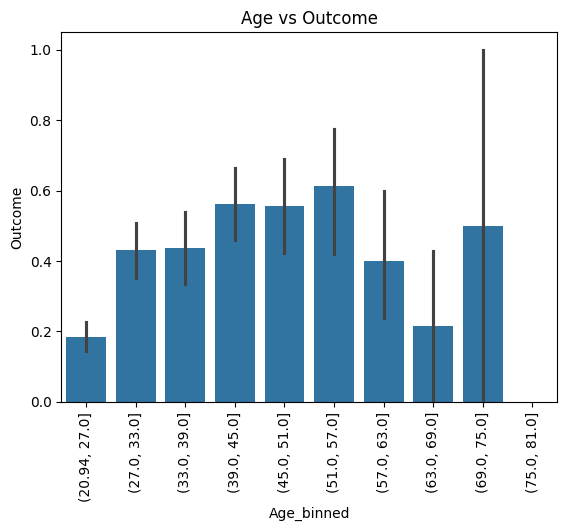

In [60]:
df['Age_binned'] = pd.cut(df['Age'], bins=10)
sns.barplot(x='Age_binned', y='Outcome', data=df)
plt.xticks(rotation=90)
plt.title('Age vs Outcome')
plt.show()

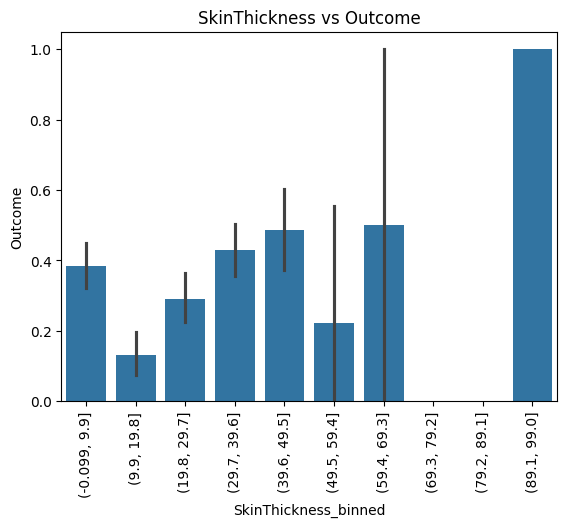

In [61]:
df['SkinThickness_binned'] = pd.cut(df['SkinThickness'], bins=10)
sns.barplot(x='SkinThickness_binned', y='Outcome', data=df)
plt.xticks(rotation=90)
plt.title('SkinThickness vs Outcome')
plt.show()

In [55]:
#splitting data into train and test set
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
predict = model.predict(X_test)
predict[0:4]

array([0, 0, 0, 0])

In [58]:
precision = precision_score(y_test, predict)
print("Precision = ", precision)
recall = recall_score(y_test, predict)
print("Recall = ", recall)
f1 = f1_score(y_test, predict)
print("F1 Score = ", f1)

Precision =  0.6379310344827587
Recall =  0.6727272727272727
F1 Score =  0.6548672566371682


In [62]:
r2_score = accuracy_score(y_test, predict)
print("Accuracy = ", r2_score)

Accuracy =  0.7467532467532467
